#### Mohamad Quteifan, Kayla Thompson, Gloria Moore
#### Professor: Brett Werner
#### DSC 630: Predictive Analytics



# Problem Statement: 



# Exploratory Data Analysis

Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
from scipy import stats
#!pip install missingno
import missingno as msno 
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score

Import dataframe, review data

In [10]:
df = pd.read_csv("plays.csv")

In [11]:
df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [12]:
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [13]:
print("The shape of the data:\n",
      df.shape, 
      "\nThe first 5 rows are:\n", 
      df.head(), 
      "\nThe last 5 rows are:\n",
      df.tail(), 
      "\nThe column names are:\n",
      df.columns)
      

The shape of the data:
 (19239, 27) 
The first 5 rows are:
        gameId  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   
2  2018090600     168  (13:05) (Shotgun) M.Ryan pass incomplete short...   
3  2018090600     190  (13:01) (Shotgun) M.Ryan pass deep left to J.J...   
4  2018090600     256  (10:59) (Shotgun) M.Ryan pass incomplete short...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   
2        1     2         10            ATL  play_type_pass          PHI   
3        1     3         10            ATL  play_type_pass          PHI   
4        1     3          1            ATL  play_type_pass          PHI   

   yardlineNumber  ... preSnapHo

# Part 1: Variable Analysis

In [6]:
print(
    "Yards To Go :\n",df["yardsToGo"].value_counts(),
    "Play Type:\n", df["playType"].value_counts(),
    "Offense Formation:\n", df["offenseFormation"].value_counts(),
    "Offensive Personnel:\n", df["personnelO"].value_counts(),
    "Defenders In The Box:\n", df["defendersInTheBox"].value_counts(),
    "Number Of Pass Rushers:\n", df["numberOfPassRushers"].value_counts(),
    "Defensive personnel:\n", df["personnelD"].value_counts(),
    "The Result of Pass Play:\n", df["passResult"].value_counts(),
    "Offense Play Result:\n", df["offensePlayResult"].value_counts(),
    "Play Results:\n", df["playResult"].value_counts(),
     )

Yards To Go :
 10    8684
6     1071
7     1047
8     1003
5      992
9      932
4      852
3      769
2      618
1      522
11     432
15     421
12     366
20     310
13     257
14     224
16     159
17     156
18     127
19     102
21      45
22      37
25      35
23      24
30      13
24      12
26      10
28       7
27       4
29       3
32       2
41       1
38       1
33       1
Name: yardsToGo, dtype: int64 Play Type:
 play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64 Offense Formation:
 SHOTGUN       12627
SINGLEBACK     2790
EMPTY          2428
I_FORM          915
PISTOL          251
JUMBO            51
WILDCAT          36
Name: offenseFormation, dtype: int64 Offensive Personnel:
 1 RB, 1 TE, 3 WR                            13716
1 RB, 2 TE, 2 WR                             2737
2 RB, 1 TE, 2 WR                             1083
1 RB, 3 TE, 1 WR                              406
1 RB, 0 TE, 4 WR                        

#### Quick Variable analysis: 
We made a few key discoveries running through the values of each feature(features that matter for the researh). One key discover comes from the playType feature. We can see that all the plays are passing plays and the data does not contain any running plays. I have to review the "play_type_unknown" value and ensure that it is a pass play. The other value, "play_type_sack" is a negative result of the pass play and it is still classified as a pass play. This was not known before and will change the overall problem statement. 

KEY TAKEAWAYS:
1. No Running Plays

2. Shotgun most common play

3. Most common offensive formation: 1 RB, 1 TE, 3 WR, 2nd most common: 1 RB, 2 TE, 2 WR

4. There usually 6-7 defenders in the box but this varies -- 4 to 8 is rather consistent.

5. Usually 4 defenders rush the passer

6. Most common defensive formation: 4 DL, 2 LB, 5 DB, with 3 DL, 3 LB, 5 DB as the runner up
- defense formations deviate more than offensive formations.

7. Defense usually wins the battle with the offense on most plays, the most common play result ==0

8. More completed passes than 

9. 

10. 

11. 


Look at what the value "play_type_unknown" represents

In [14]:
df_copy = df.copy()
df_copy.loc[(df_copy['playType'] == "play_type_unknown")]
df_copy.loc[(df_copy['playType'] == "play_type_unknown")]


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18606,2018090600,1226,(8:23) (Shotgun) N.Foles pass incomplete short...,2,3,7,PHI,play_type_unknown,ATL,17,...,NaN,NaN,NaN,DPI,ATL 21,I,0,8,1.169181,True
18607,2018090600,1715,(1:50) (Shotgun) N.Foles pass short right to N...,2,1,10,PHI,play_type_unknown,PHI,24,...,NaN,NaN,NaN,DH,ATL 21,C,7,5,0.169598,False
18608,2018090600,2305,(13:44) (Shotgun) N.Foles pass incomplete shor...,3,1,10,PHI,play_type_unknown,PHI,36,...,NaN,NaN,NaN,ICT,ATL 23,I,0,5,0.309866,False
18609,2018090600,3626,(8:31) (Shotgun) N.Foles pass short right to N...,4,3,4,PHI,play_type_unknown,PHI,31,...,NaN,NaN,NaN,OPI,PHI 86,C,10,-10,-0.694743,False
18610,2018090600,4439,(:06) (Shotgun) M.Ryan pass incomplete short r...,4,4,10,ATL,play_type_unknown,PHI,10,...,NaN,NaN,NaN,ICT,PHI 58,I,0,5,1.383655,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


They are just pass plays that are either short or incompete. Confirms our orginal conclusion that the data is made up of only pass plays(success + unsuccessful pass plays). What needs to be done with the play type variable is convert to only one value, pass play. This will be much easier to work with and containing those other 2 values is only going to slow down the model and analysis. For the purpose of this study as suck is an unsuccessful pass play. 

### Check empty for empty or Nan values

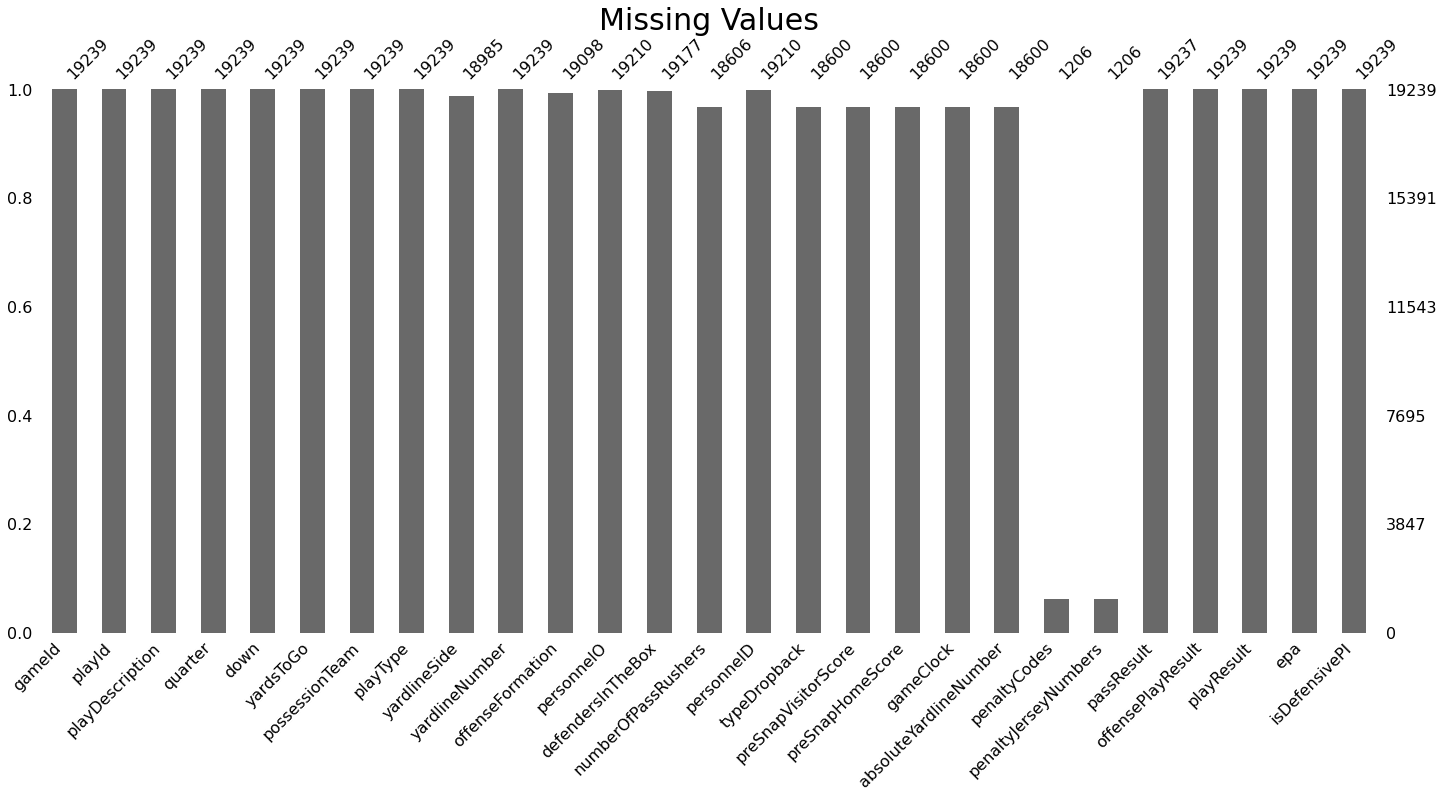

In [17]:
msno.bar(df)
#plt.figure(figsize=(10,10))
#plt.xlabel('Columns', fontsize = 30 )
#plt.ylabel('Values')
plt.title('Missing Values', fontsize = 30)
# Show the figure
plt.show()

In [15]:
print("There are:   ", df["yardsToGo"].isnull().values.sum(), " in the Yards to go column",
      "\nThere are: ", df["playType"].isnull().values.sum(), "in the Play Type column",
      "\nThere are: ", df["offenseFormation"].isnull().values.sum(), "in the offense Formation column",
      "\nThere are: ", df["personnelO"].isnull().values.sum(), "in the Offensive personnel column",
      "\nThere are: ", df["defendersInTheBox"].isnull().values.sum(), "in the defenders in the box column",
      "\nThere are: ", df["numberOfPassRushers"].isnull().values.sum(), "in the number Of PassRushers column",
      "\nThere are: ", df["personnelD"].isnull().values.sum(), "in the Defensive personnel column",
      "\nThere are: ", df["passResult"].isnull().values.sum(), "in the Result of the play column",
      "\nThere are: ", df["offensePlayResult"].isnull().values.sum(), "in the Result of the offensive Play column",
      "\nThere are: ", df["playResult"].isnull().values.sum(), "in the play result column"
     )

There are:    0  in the Yards to go column 
There are:  0 in the Play Type column 
There are:  141 in the offense Formation column 
There are:  29 in the Offensive personnel column 
There are:  62 in the defenders in the box column 
There are:  633 in the number Of PassRushers column 
There are:  29 in the Defensive personnel column 
There are:  2 in the Result of the play column 
There are:  0 in the Result of the offensive Play column 
There are:  0 in the play result column


There are missing values in the data frame and we have review the offensive formation, offensive personnel, defenders in the box, pass rushers column, Defensive Personnel column and result of the play column. The result of the play column maybe one that we may need to remove from the data because it may lead to issues with the model. 

#### Variable 1 with empty values: Offensive Personnel and distribution

In [22]:
df_copy1 = df.copy()
off_per = df_copy["personnelO"]
off_per

0        2 RB, 1 TE, 2 WR
1        1 RB, 1 TE, 3 WR
2        2 RB, 1 TE, 2 WR
3        1 RB, 1 TE, 3 WR
4        2 RB, 3 TE, 0 WR
               ...       
19234    1 RB, 1 TE, 3 WR
19235    1 RB, 1 TE, 3 WR
19236    1 RB, 1 TE, 3 WR
19237    1 RB, 1 TE, 3 WR
19238    1 RB, 1 TE, 3 WR
Name: personnelO, Length: 19239, dtype: object

In [45]:
off_per.isnull().values.sum()
#29 mising values, we already knew from earlier.
df1 = df_copy1[off_per.isna()]
df1


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18629,2018090906,1188,(11:30) (Shotgun) R.Fitzpatrick pass incomplet...,2,3,7,TB,play_type_unknown,NO,15,...,NaN,NaN,NaN,DH;OPI,NO 21;TB 10,I,0,0,-0.000288,False
18658,2018091602,2823,(12:54) (Shotgun) A.Rodgers pass deep right in...,4,1,10,GB,play_type_unknown,GB,36,...,NaN,NaN,NaN,ILM;DH,GB 18;MIN 22,IN,0,0,0.006909,False
18690,2018091611,3501,(3:53) (Shotgun) D.Carr pass deep right to A.C...,4,2,6,OAK,play_type_unknown,OAK,40,...,NaN,NaN,NaN,DPI;OPI,DEN 29;OAK 89,C,29,0,-0.000406,True
18698,2018092303,950,(13:48) E.Manning pass short right to C.Latime...,2,1,10,NYG,play_type_unknown,HOU,27,...,NaN,NaN,NaN,ICT;TAU,HOU 22;NYG 87,C,14,0,-0.001846,False
18699,2018092303,3099,(10:05) (Shotgun) D.Watson pass incomplete dee...,4,1,10,HOU,play_type_unknown,NYG,20,...,NaN,NaN,NaN,OH;DH,HOU 66;NYG 20,I,0,0,0.000406,False
18722,2018092306,1098,(12:26) (Shotgun) R.Tannehill pass incomplete ...,2,3,9,MIA,play_type_unknown,OAK,34,...,NaN,NaN,NaN,OH;RPS,MIA 86;OAK 73,I,0,0,0.002487,False
18775,2018100701,3541,(8:08) (Shotgun) C.Newton pass incomplete shor...,4,1,10,CAR,play_type_unknown,CAR,25,...,NaN,NaN,NaN,OH;RPS,CAR 74;NYG 72,I,0,0,0.002345,False
18780,2018100704,1490,(9:13) M.Stafford pass deep right to M.Jones t...,2,2,8,DET,play_type_unknown,DET,48,...,NaN,NaN,NaN,DPI;ILH,GB 20;DET 60,C,39,0,0.004934,True
18790,2018100711,2987,(4:36) G.Fant reported in as eligible. R.Wils...,3,1,10,SEA,play_type_unknown,SEA,36,...,NaN,NaN,NaN,DH;ING,LA 22;SEA 3,I,0,0,-0.000991,False
18832,2018101412,2923,(:17) (Shotgun) T.Brady pass incomplete deep r...,3,2,9,NE,play_type_unknown,NE,26,...,NaN,NaN,NaN,DH;OPI,KC 23;NE 11,I,0,0,0.000360,False


In [ ]:
Ther

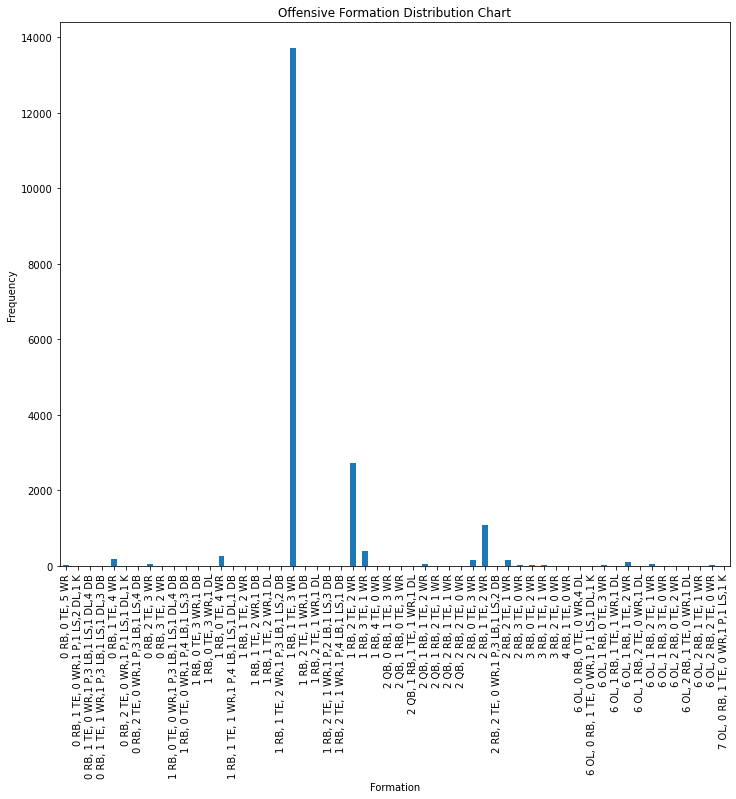

In [24]:
plt.figure(figsize=(12,10))
df_copy1.groupby("personnelO").size().plot(kind='bar')
# Label the axes
plt.xlabel("Formation")
plt.ylabel("Frequency")
plt.title("Offensive Formation Distribution Chart")
# Show the figure
plt.show()

#### Distribution analysis on Offensive formation, methods to work with the uneven distributions
The issue is there is no big variation in the data, most of the time the offense is going to line up in the standard formation(1RB:1TE:3WR) with the distant second being the 2 TE formation(1RB:2TE:2WR).